# Multi-Vanillin

In [1]:
import numpy as np
import pandas as pd

res_path = '/home/caoyh/project/MooSeeker/MyNewMooSeeker/cache/result/multi_vanillin/'
hist = np.load(res_path+'history.npz', allow_pickle=True)
res = np.load(res_path+'result.npz', allow_pickle=True)

# history
# X 
hist_x = hist['X'].tolist()
X = []
for i in range(len(hist_x)):
    X += hist_x[i]

# F
F = []
for i in range(len(hist['F'])):
    F += hist['F'][i]
F_all = pd.DataFrame(F, columns=['Length', 'Gibbs', 'Yield'])
# 1. 去掉重复 2. 去掉不可用的部分
F_pd = F_all.drop_duplicates(keep='last')
F_pd = F_pd[F_pd['Yield']>-49]
F_pd= F_pd[F_pd['Gibbs']<0]
F_pd= F_pd[F_pd['Yield']<0]


## Pareto Front
# 1. calculate the front of each f
from pymoo.util.nds.fast_non_dominated_sort import fast_non_dominated_sort
fronts = fast_non_dominated_sort(np.array(F_pd))
# 2. let the front be the lable of each f
label = np.zeros(shape=(len(F_pd),1), dtype=int)
for i in range(len(fronts)):
    for k in fronts[i]:
        label[k] = i
F_pd['Label'] = label
# 3. sorted the pd by label, and save f and its label to csv 
sorted_f = F_pd.sort_values(by='Label')

In [2]:
print('=====Min Length=====')
idx = sorted_f.loc[sorted_f.Length==min(sorted_f.Length)].index[0]
print(sorted_f.loc[idx])
print(X[idx][0].chrom.travel())

=====Min Length=====
Length     5.000000
Gibbs    -17.053108
Yield     -1.353822
Label      0.000000
Name: 321, dtype: float64
R12759 : C00082  -->  C00146 ,
R00815 : C00146  -->  C00090 ,
R00822 : C00090  -->  C00230 ,
R10136 : C00230  -->  C06672 ,
R05699 : C06672  -->  C00755 ,
[['R12759', 'C00082', 'C00146'], ['R00815', 'C00146', 'C00090'], ['R00822', 'C00090', 'C00230'], ['R10136', 'C00230', 'C06672'], ['R05699', 'C06672', 'C00755']]


In [3]:
print('=====Min Gibbs=====')
idx = sorted_f.loc[sorted_f.Gibbs==min(sorted_f.Gibbs)].index[0]
print(sorted_f.loc[idx])
print(X[idx][0].chrom.travel())

=====Min Gibbs=====
Length     8.000000
Gibbs    -28.832895
Yield     -0.010000
Label      0.000000
Name: 332, dtype: float64
R00729 : C00082  -->  C01179 ,
R02521 : C01179  -->  C00544 ,
R02520 : C00544  -->  C05585 ,
R02655 : C05585  -->  C00628 ,
R02589 : C00628  -->  C00587 ,
R01628 : C00587  -->  C00230 ,
R05274 : C00230  -->  C06672 ,
R05699 : C06672  -->  C00755 ,
[['R00729', 'C00082', 'C01179'], ['R02521', 'C01179', 'C00544'], ['R02520', 'C00544', 'C05585'], ['R02655', 'C05585', 'C00628'], ['R02589', 'C00628', 'C00587'], ['R01628', 'C00587', 'C00230'], ['R05274', 'C00230', 'C06672'], ['R05699', 'C06672', 'C00755']]


In [4]:
print('=====Min -Yield=====')
idx = sorted_f.loc[sorted_f.Yield==min(sorted_f.Yield)].index[0]
print(sorted_f.loc[idx])
print(X[idx][0].chrom.travel())

=====Min -Yield=====
Length    11.000000
Gibbs     -0.311854
Yield    -42.780674
Label      0.000000
Name: 67, dtype: float64
R09830 : C00082  -->  C01179 ,
R00729 : C01179  -->  C00082 ,
R10246 : C00082  -->  C01468 ,
R03568 : C01468  -->  C06730 ,
R05294 : C06730  -->  C06677 ,
R05281 : C06677  -->  C06678 ,
R05271 : C06678  -->  C06679 ,
R05272 : C06679  -->  C02236 ,
R01636 : C02236  -->  C00230 ,
R05274 : C00230  -->  C06672 ,
R05699 : C06672  -->  C00755 ,
[['R09830', 'C00082', 'C01179'], ['R00729', 'C01179', 'C00082'], ['R10246', 'C00082', 'C01468'], ['R03568', 'C01468', 'C06730'], ['R05294', 'C06730', 'C06677'], ['R05281', 'C06677', 'C06678'], ['R05271', 'C06678', 'C06679'], ['R05272', 'C06679', 'C02236'], ['R01636', 'C02236', 'C00230'], ['R05274', 'C00230', 'C06672'], ['R05699', 'C06672', 'C00755']]


# Multi-Glycolysis

In [5]:
import numpy as np
import pandas as pd

res_path = '/home/caoyh/project/MooSeeker/MyNewMooSeeker/cache/result/multi_glycolysis/'
hist = np.load(res_path+'history.npz', allow_pickle=True)
res = np.load(res_path+'result.npz', allow_pickle=True)

# history
# X 
hist_x = hist['X'].tolist()
X = []
for i in range(len(hist_x)):
    X += hist_x[i]

# F
F = []
for i in range(len(hist['F'])):
    F += hist['F'][i]
F_all = pd.DataFrame(F, columns=['Length', 'Gibbs', 'Yield'])
# 1. 去掉重复 2. 去掉不可用的部分
F_pd = F_all.drop_duplicates(keep='last')
F_pd = F_pd[F_pd['Yield']>-49]
F_pd= F_pd[F_pd['Gibbs']<0]
F_pd= F_pd[F_pd['Yield']<0]


## Pareto Front
# 1. calculate the front of each f
from pymoo.util.nds.fast_non_dominated_sort import fast_non_dominated_sort
fronts = fast_non_dominated_sort(np.array(F_pd))
# 2. let the front be the lable of each f
label = np.zeros(shape=(len(F_pd),1), dtype=int)
for i in range(len(fronts)):
    for k in fronts[i]:
        label[k] = i
F_pd['Label'] = label
# 3. sorted the pd by label, and save f and its label to csv 
sorted_f = F_pd.sort_values(by='Label')

In [6]:
print('=====Min Length=====')
idx = sorted_f.loc[sorted_f.Length==min(sorted_f.Length)].index[0]
print(sorted_f.loc[idx])
print(X[idx][0].chrom.travel())

=====Min Length=====
Length     4.000000
Gibbs    -15.012888
Yield    -38.509167
Label      0.000000
Name: 227, dtype: float64
R07265 : C00267  -->  C01083 ,
R00010 : C01083  -->  C00031 ,
R03323 : C00031  -->  C00149 ,
R00216 : C00149  -->  C00022 ,
[['R07265', 'C00267', 'C01083'], ['R00010', 'C01083', 'C00031'], ['R03323', 'C00031', 'C00149'], ['R00216', 'C00149', 'C00022']]


In [7]:
print('=====Min Gibbs=====')
idx = sorted_f.loc[sorted_f.Gibbs==min(sorted_f.Gibbs)].index[0]
print(sorted_f.loc[idx])
print(X[idx][0].chrom.travel())

=====Min Gibbs=====
Length     5.000000
Gibbs    -23.780574
Yield     -4.910000
Label      0.000000
Name: 233, dtype: float64
R00802 : C00267  -->  C00089 ,
R05140 : C00089  -->  C00031 ,
R00725 : C00031  -->  C00104 ,
R00726 : C00104  -->  C00036 ,
R12212 : C00036  -->  C00022 ,
[['R00802', 'C00267', 'C00089'], ['R05140', 'C00089', 'C00031'], ['R00725', 'C00031', 'C00104'], ['R00726', 'C00104', 'C00036'], ['R12212', 'C00036', 'C00022']]


In [8]:
print('=====Min -Yield=====')
idx = sorted_f.loc[sorted_f.Yield==min(sorted_f.Yield)].index[0]
print(sorted_f.loc[idx])
print(X[idx][0].chrom.travel())

=====Min -Yield=====
Length     4.000000
Gibbs    -15.012888
Yield    -38.509167
Label      0.000000
Name: 227, dtype: float64
R07265 : C00267  -->  C01083 ,
R00010 : C01083  -->  C00031 ,
R03323 : C00031  -->  C00149 ,
R00216 : C00149  -->  C00022 ,
[['R07265', 'C00267', 'C01083'], ['R00010', 'C01083', 'C00031'], ['R03323', 'C00031', 'C00149'], ['R00216', 'C00149', 'C00022']]


# 画图

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2022.09.1


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from io import BytesIO
import numpy as np
from PIL import Image, ImageOps
def _drawerToImage(d2d):
    try:
        import Image
    except ImportError:
        from PIL import Image
    sio = BytesIO(d2d.GetDrawingText())
    return Image.open(sio)

def clourMol(mol,highlightAtoms_p=None,highlightAtomColors_p=None,highlightBonds_p=None,highlightBondColors_p=None,sz=[400,400]):
    '''

    '''
    d2d = rdMolDraw2D.MolDraw2DCairo(sz[0], sz[1])
    op = d2d.drawOptions()
    op.dotsPerAngstrom = 20
    op.useBWAtomPalette()
    mc = rdMolDraw2D.PrepareMolForDrawing(mol)
    d2d.DrawMolecule(mc, legend='', highlightAtoms=highlightAtoms_p,highlightAtomColors=highlightAtomColors_p, highlightBonds= highlightBonds_p,highlightBondColors=highlightBondColors_p)
    d2d.FinishDrawing()
    product_img=_drawerToImage(d2d)
    return product_img
def StripAlphaFromImage(img):
    '''This function takes an RGBA PIL image and returns an RGB image'''

    if len(img.split()) == 3:
        return img
    return Image.merge('RGB', img.split()[:3])


def TrimImgByWhite(img, padding=10):
    '''This function takes a PIL image, img, and crops it to the minimum rectangle
    based on its whiteness/transparency. 5 pixel padding used automatically.'''

    # Convert to array
    as_array = np.array(img)  # N x N x (r,g,b,a)

    # Set previously-transparent pixels to white
    if as_array.shape[2] == 4:
        as_array[as_array[:, :, 3] == 0] = [255, 255, 255, 0]

    as_array = as_array[:, :, :3]

    # Content defined as non-white and non-transparent pixel
    has_content = np.sum(as_array, axis=2, dtype=np.uint32) != 255 * 3
    xs, ys = np.nonzero(has_content)

    # Crop down
    margin = 5
    x_range = max([min(xs) - margin, 0]), min([max(xs) + margin, as_array.shape[0]])
    y_range = max([min(ys) - margin, 0]), min([max(ys) + margin, as_array.shape[1]])
    as_array_cropped = as_array[
        x_range[0]:x_range[1], y_range[0]:y_range[1], 0:3]

    img = Image.fromarray(as_array_cropped, mode='RGB')

    return ImageOps.expand(img, border=padding, fill=(255, 255, 255))


In [3]:
from utils import read_json
cpd_dict = read_json('cache/data/all_cpd_dict.json')

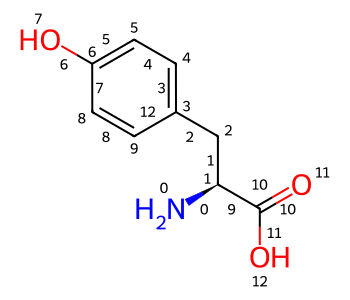

In [4]:
cpd = 'C00082'
smile = cpd_dict[cpd]['smile']
mol = Chem.MolFromSmiles(smile)
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

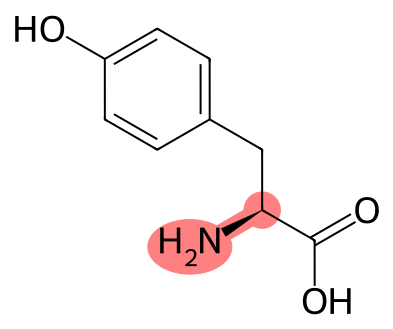

In [5]:
#hight atoms
img1 = clourMol(mol,highlightAtoms_p=[0, 1], highlightBonds_p=[0])
img1 =StripAlphaFromImage(img1)
img1 = TrimImgByWhite(img1)
display(img1)

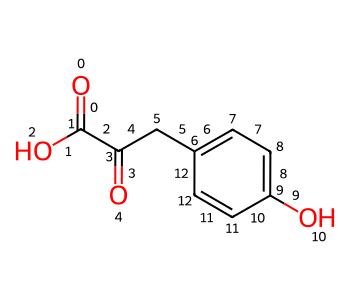

In [21]:
cpd = 'C01179'
smile = cpd_dict[cpd]['smile']
mol = Chem.MolFromSmiles(smile)
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [6]:
img1.save('cache/images/'+cpd+'.png')


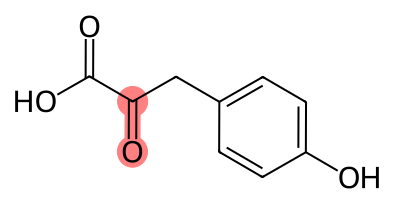

In [23]:
#hight atoms
img1 = clourMol(mol,highlightAtoms_p=[3, 4], highlightBonds_p=[3])
img1 =StripAlphaFromImage(img1)
img1 = TrimImgByWhite(img1)
display(img1)

In [ ]:
from rembg import remove

#待处理的图片路径
input_path = 'cache/images/C00082.png'
#处理后存储的图片路径
output_path = 'cache/images/_C00082.png'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)


In [9]:
t = pd.DataFrame(np.random.rand(5,3)*4+3)
t 

NameError: name 'pd' is not defined

In [ ]:
t.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))

,0,1,2
0,0.000000,0.855239,1.000000
1,0.384579,0.139104,0.000000
2,1.000000,1.000000,0.679536
3,0.913717,0.000000,0.754838
4,0.589026,0.246904,0.939060
